<a href="https://colab.research.google.com/github/DommiiUdomp/Dommii/blob/main/IntroVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Matplotlib**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

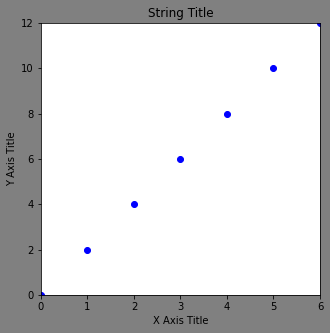

In [9]:
#parameters
x = np.arange(0,10)
y = 2*x

# Creates blank canvas
fig = plt.figure(figsize = (5,5), facecolor= 'gray', edgecolor= 'red' )

plt.plot(x, y, 'bo') 
plt.xlabel('X Axis Title')
plt.ylabel('Y Axis Title')
plt.title('String Title')
plt.xlim(0,6) # Lower Limit, Upper Limit
plt.ylim(0,12) # Lower Limit, Upper Limit
plt.show() # Required for non-jupyter users , but also removes Out[] info

Text(0.5, 1.0, 'Small Out Figure')

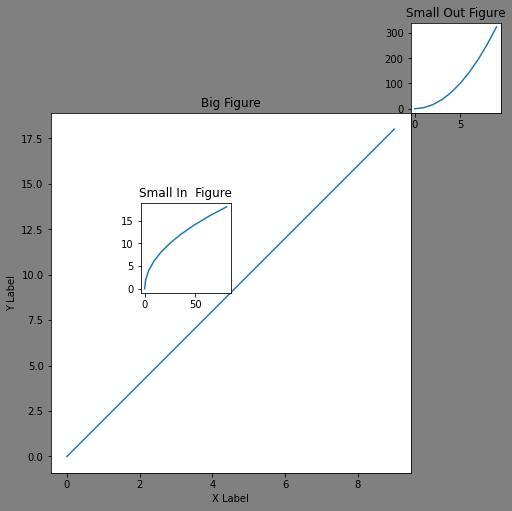

In [20]:
fig = plt.figure(figsize = (5,5), facecolor= 'gray', edgecolor= 'red' ) # Creates  canvas

axes1 = fig.add_axes([0, 0, 1, 1]) # Large figure
axes2 = fig.add_axes([0.25, 0.5, 0.25, 0.25]) # Smaller figure
axes3 = fig.add_axes([1, 1, 0.25, 0.25])

axes1.plot(x,y) # Larger Figure Axes 1

# Use set_ to add to the axes figure
axes1.set_xlabel('X Label')
axes1.set_ylabel('Y Label')
axes1.set_title('Big Figure')

axes2.plot(x**2,y) # Insert Figure Axes 2
axes2.set_title('Small In  Figure')

axes3.plot(x,y**2) # Insert Figure Axes 3
axes3.set_title('Small Out Figure')

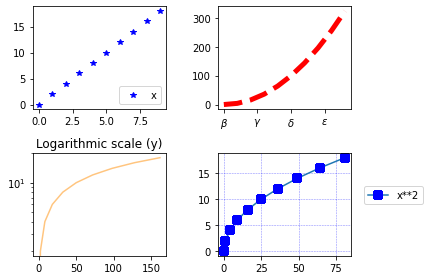

In [49]:
fig,axes = plt.subplots(nrows=2,ncols=2) # subplot 

axes[0][0].plot(x,y, 'b*' , label="x")
axes[1][1].plot(x**2,y, marker='+',markersize=10, markerfacecolor="red", markeredgewidth=8, markeredgecolor="blue", label="x**2")
axes[1][0].plot(x*y,y,color="#FF8C00" , alpha=0.5, label="x*y")
axes[0][1].plot(x,y**2, color="red", linewidth=5, linestyle='--')  

fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=2,
    hspace=1)

axes[0][0].legend(loc=4)
axes[1][1].legend(loc=(1.1,0.5))
axes[1][1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[1][0].set_yscale("log")
axes[1][0].set_title("Logarithmic scale (y)")
axes[0][1].set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=10)
plt.tight_layout()

Text(0.5, 1.0, 'fill_between')

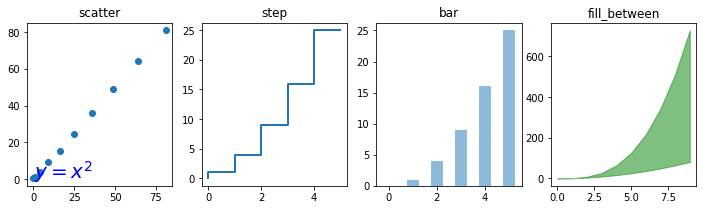

In [55]:
n = np.array([0,1,2,3,4,5])

fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(x*x, x*x + 0.25*np.random.randn(len(x*x)))
axes[0].set_title("scatter")
axes[0].text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between")

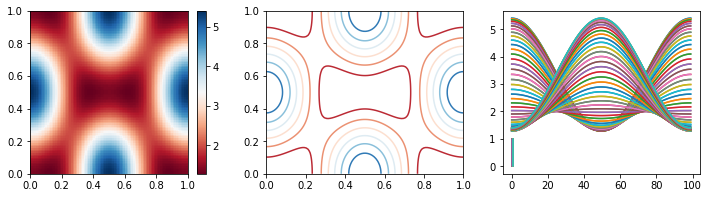

In [78]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

fig, axes = plt.subplots(1, 3, figsize=(12,3))

p = axes[0].pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=plt.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=axes[0])

cnt = axes[1].contour(Z, cmap=plt.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

axes[2].plot(X/(2*np.pi), Y/(2*np.pi), Z)

**3D**

In [62]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


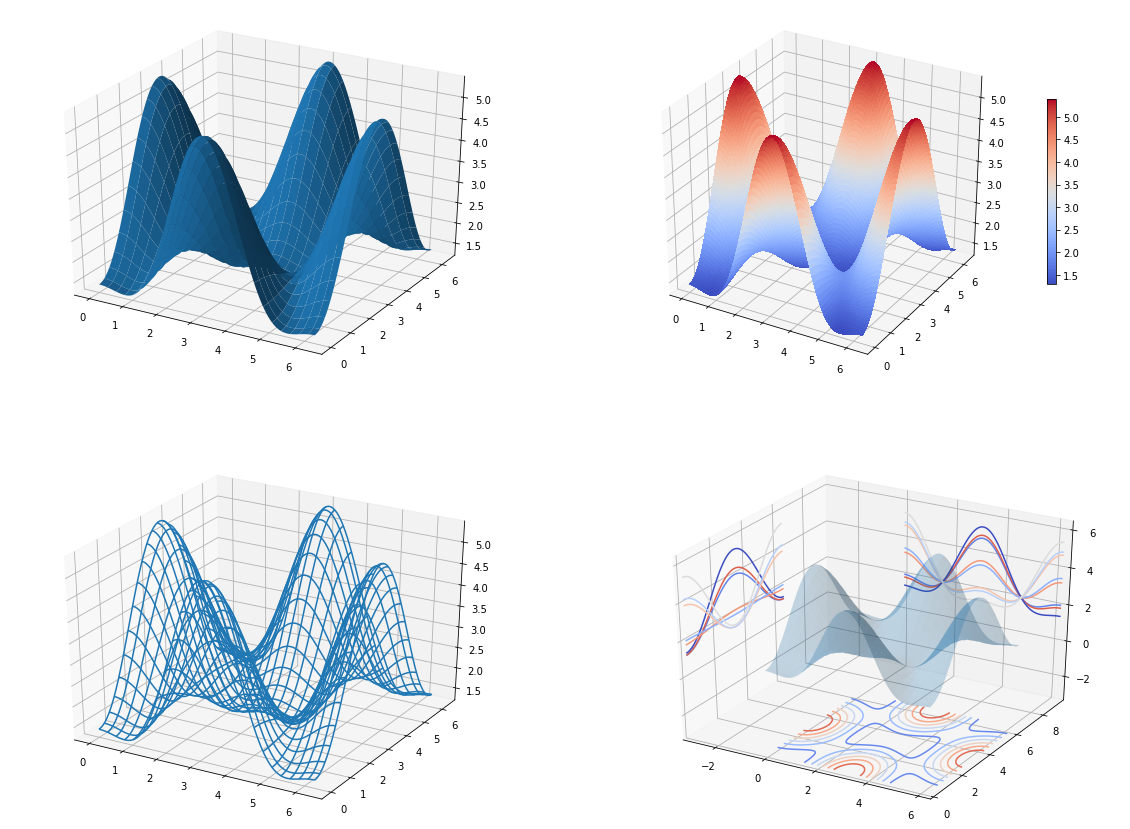

In [118]:
fig = plt.figure(figsize=(20,15))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(221, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(222, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

#wire frame
ax = fig.add_subplot(223, projection='3d')
p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

#contour
axc = fig.add_subplot(224, projection='3d')
axc.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = axc.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=plt.cm.coolwarm)
cset = axc.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=plt.cm.coolwarm)
cset = axc.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=plt.cm.coolwarm)
axc.set_xlim3d(-np.pi, 2*np.pi);
axc.set_ylim3d(0, 3*np.pi);
axc.set_zlim3d(-np.pi, 2*np.pi);

# **SeaBorn**

In [99]:
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0`, but please update your code.
  warnings.warn(msg, UserWarning)


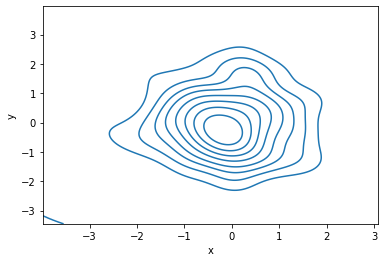

In [116]:
random_data = pd.DataFrame(np.random.normal(0,1,size=(100,2)),columns=['x','y'])
sns.kdeplot(data=random_data,x='x',y='y', shade_lowest=True)

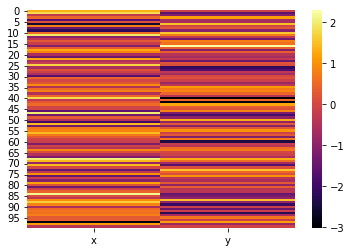

In [114]:
sns.heatmap(random_data,cmap=plt.cm.inferno)